### Q2

"What kind of military aid has been provided to Ukraine?" 

Data source: https://www.ifw-kiel.de/publications/ukraine-support-tracker-data-20758

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load only the sheet you want
sheet_name = "Bilateral Assistance, MAIN DATA"  # Change this to your actual sheet name
xlsx_path = "Ukraine_Support_Tracker_Release_21.xlsx"  # Replace with your file path
csv_path = "BilateralAssistance.csv"       # Desired output name

# Read the specific sheet
df = pd.read_excel(xlsx_path, sheet_name=sheet_name, engine='openpyxl')

# Export to CSV
df.to_csv(csv_path, index=False)

In [2]:

# Load only the sheet you want
sheet_name = "Table1"  # Change this to your actual sheet name
xlsx_path = "Ukraine_Support_Tracker_Release_21.xlsx"  # Replace with your file path
csv_path = "BilateralAssistance.csv"       # Desired output name

# Read the specific sheet
df = pd.read_excel(xlsx_path, sheet_name=sheet_name, engine='openpyxl')

# Export to CSV
df.to_csv(csv_path, index=False)

In [3]:
# Extract all the rows having Geographic Europe = 1

df = df[df['Geographic Europe'] == 1]
# Drop the EU (Commission and Council) row 

df = df[df['Country'] != 'EU (Commission and Council)']

/tmp/ipykernel_69702/236608168.py:14: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pivot_df = grouped.pivot(index='Country', columns='aid_type_general', values='allocation_value').fillna(0)


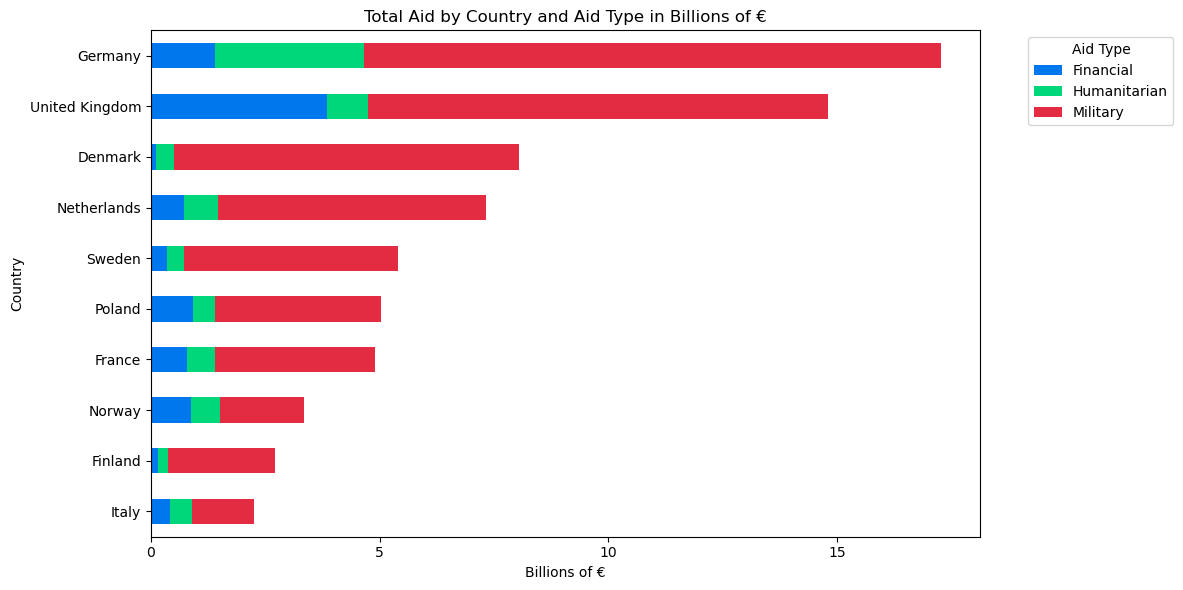

In [7]:

alloc_df = pd.DataFrame(df)

# Melt the DataFrame into long format
long_df = alloc_df.melt(id_vars= ['Country', 'Total bilateral allocations4'], 
                        value_vars=['Financial allocations', 'Humanitarian allocations', 'Military allocations'],
                        var_name='aid_type_general', 
                        value_name='allocation_value')

# Clean aid_type_general for better labeling
long_df['aid_type_general'] = long_df['aid_type_general'].str.replace(' allocations', '')

# Group and pivot for plotting
grouped = long_df.groupby(['Country', 'aid_type_general'])['allocation_value'].sum().reset_index()
pivot_df = grouped.pivot(index='Country', columns='aid_type_general', values='allocation_value').fillna(0)

# Compute total and sort
pivot_df['Total'] = pivot_df.sum(axis=1)
pivot_df_sorted = pivot_df.sort_values('Total', ascending=True).drop(columns='Total')

pivot_df_sorted = pivot_df_sorted.tail(10)

# Use the user's custom color mapping
custom_colors = {
    'Military': '#E32C41',       # Red
    'Humanitarian': '#00d77a',   # Green
    'Financial': '#0077ec',      # Blue
}
colors = [custom_colors.get(aid_type, '#BBBBBB') for aid_type in pivot_df_sorted.columns]

# Plot
ax = pivot_df_sorted.plot(kind='barh', stacked=True, figsize=(10, 6), color=colors)
plt.xlabel('Billions of €')
plt.ylabel('Country')
plt.title('Total Aid by Country and Aid Type in Billions of €')
plt.xticks(ticks=np.arange(0, 20, 5))  # Custom x-ticks
plt.grid(False)  # Remove vertical lines
plt.tight_layout()
plt.legend(title='Aid Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()